<a href="https://colab.research.google.com/github/Vincent3003/Analyze-Layoff-Data/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Leveraging Data Analytics to Optimize Workforce Management: </h1>
<h4>A Layoff Dataset Analysis </h4>

<h2>I.   Clean a dataset </h2>




In [60]:
# import libraries
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import random
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# from flask import Flask, request, jsonify


# The first step is to mount your Google Drive to your Colab account.
#You will be asked to authorize Colab to access your Google Drive. Follow the steps they lead you throuh.

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path = '/content/drive/MyDrive/Project/layoffs_data(3).csv'

layoff = pd.read_csv(path)
print("data is a ", type(layoff))

data is a  <class 'pandas.core.frame.DataFrame'>


In [3]:
layoff.shape

(3485, 12)

In [4]:
print(layoff)

              Company     Location_HQ        Industry  Percentage        Date  \
0              Fisker     Los Angeles  Transportation        0.15  2024-02-29   
1     Electronic Arts     SF Bay Area        Consumer        0.05  2024-02-28   
2              Vacasa        Portland          Travel        0.05  2024-02-28   
3      Treasury Prime     SF Bay Area         Finance        0.40  2024-02-28   
4            Motional          Boston  Transportation        0.05  2024-02-28   
...               ...             ...             ...         ...         ...   
3480          Service     Los Angeles          Travel        1.00  2020-03-16   
3481     HopSkipDrive     Los Angeles  Transportation        0.10  2020-03-13   
3482      Panda Squad     SF Bay Area        Consumer        0.75  2020-03-13   
3483    Tamara Mellon     Los Angeles          Retail        0.40  2020-03-12   
3484         EasyPost  Salt Lake City       Logistics         NaN  2020-03-11   

                           

In [5]:
layoff.isna()

,Company,Location_HQ,Industry,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,List_of_Employees_Laid_Off
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3480,False,False,False,False,False,False,False,False,False,False,True,False
3481,False,False,False,False,False,False,False,False,False,False,False,False
3482,False,False,False,False,False,False,False,False,False,False,False,False
3483,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
# drop Source and List_of_Employees_Laid_Off columns since it is not neccesarily
layoff_new = layoff.drop(columns=['Source', 'List_of_Employees_Laid_Off', 'Date_Added'])

In [7]:
# rename Laid_Off_count column to Layoff
layoff_new.rename(columns = {'Laid_Off_Count': 'Layoffs'}, inplace = True)

In [8]:
# Convert the 'Date' column to a datetime format
layoff_new['Quarter'] = pd.to_datetime(layoff_new['Date']).dt.to_period('Q')

# Convert the 'Date' column to datetime format
layoff_new['Date'] = pd.to_datetime(layoff_new['Date'])
print(layoff_new)

              Company     Location_HQ        Industry  Percentage       Date  \
0              Fisker     Los Angeles  Transportation        0.15 2024-02-29   
1     Electronic Arts     SF Bay Area        Consumer        0.05 2024-02-28   
2              Vacasa        Portland          Travel        0.05 2024-02-28   
3      Treasury Prime     SF Bay Area         Finance        0.40 2024-02-28   
4            Motional          Boston  Transportation        0.05 2024-02-28   
...               ...             ...             ...         ...        ...   
3480          Service     Los Angeles          Travel        1.00 2020-03-16   
3481     HopSkipDrive     Los Angeles  Transportation        0.10 2020-03-13   
3482      Panda Squad     SF Bay Area        Consumer        0.75 2020-03-13   
3483    Tamara Mellon     Los Angeles          Retail        0.40 2020-03-12   
3484         EasyPost  Salt Lake City       Logistics         NaN 2020-03-11   

      Funds_Raised     Stage        Cou

In [9]:
np.unique(layoff_new['Industry'])     # Check the unique variables in Industry columns

array(['AI', 'Aerospace', 'Construction', 'Consumer', 'Crypto', 'Data',
       'Education', 'Energy', 'Finance', 'Fitness', 'Food', 'HR',
       'Hardware', 'Healthcare', 'Infrastructure', 'Legal', 'Logistics',
       'Manufacturing', 'Marketing', 'Media', 'Other', 'Product',
       'Real Estate', 'Recruiting', 'Retail', 'Sales', 'Security',
       'Support', 'Transportation', 'Travel', 'Unknown'], dtype=object)

In [10]:
np.unique(layoff_new['Stage'])     # Check the unique variables in Stage columns

array(['Acquired', 'Post-IPO', 'Private Equity', 'Seed', 'Series A',
       'Series B', 'Series C', 'Series D', 'Series E', 'Series F',
       'Series G', 'Series H', 'Series I', 'Series J', 'Subsidiary',
       'Unknown'], dtype=object)

In [11]:
# replace missing data to 0 value
print("before drop: ", layoff_new.shape)
layoff_new.fillna(0, inplace=True)
print("after drop: " , layoff_new.shape)

before drop:  (3485, 10)
after drop:  (3485, 10)


In [12]:
# see how many duplicate in a dataset & replace it
print('Amount of duplicates - Before: {:,}'.format(layoff_new.duplicated().sum()))
layoff_new.drop_duplicates(inplace=True)
print('Amount of duplicates - After: {:,}'.format(layoff_new.duplicated().sum()))

Amount of duplicates - Before: 2
Amount of duplicates - After: 0


In [13]:
layoff_new.head(10)

,Company,Location_HQ,Industry,Percentage,Date,Funds_Raised,Stage,Country,Layoffs,Quarter
0,Fisker,Los Angeles,Transportation,0.15,2024-02-29,1700.0,Post-IPO,United States,0.0,2024Q1
1,Electronic Arts,SF Bay Area,Consumer,0.05,2024-02-28,2.0,Post-IPO,United States,670.0,2024Q1
2,Vacasa,Portland,Travel,0.05,2024-02-28,834.0,Post-IPO,United States,320.0,2024Q1
3,Treasury Prime,SF Bay Area,Finance,0.40,2024-02-28,71.0,Series C,United States,40.0,2024Q1
4,Motional,Boston,Transportation,0.05,2024-02-28,0.0,Unknown,United States,0.0,2024Q1
5,Sony Interactive,SF Bay Area,Consumer,0.08,2024-02-27,0.0,Subsidiary,United States,900.0,2024Q1
6,Bumble,Austin,Consumer,0.30,2024-02-27,313.0,Post-IPO,United States,350.0,2024Q1
7,PropertyGuru,Singapore,Real Estate,0.00,2024-02-27,676.0,Post-IPO,Singapore,79.0,2024Q1
8,Apple,SF Bay Area,Transportation,0.00,2024-02-27,1200.0,Post-IPO,United States,0.0,2024Q1
9,Expedia,Seattle,Travel,0.08,2024-02-26,3300.0,Post-IPO,United States,1500.0,2024Q1


In [14]:
print(layoff_new.dtypes)

Company                 object
Location_HQ             object
Industry                object
Percentage             float64
Date            datetime64[ns]
Funds_Raised           float64
Stage                   object
Country                 object
Layoffs                float64
Quarter          period[Q-DEC]
dtype: object


In [15]:
# or in one step:
layoff_USA = layoff_new[ layoff_new['Country'] == 'United States' ]
layoff_USA

,Company,Location_HQ,Industry,Percentage,Date,Funds_Raised,Stage,Country,Layoffs,Quarter
0,Fisker,Los Angeles,Transportation,0.15,2024-02-29,1700.0,Post-IPO,United States,0.0,2024Q1
1,Electronic Arts,SF Bay Area,Consumer,0.05,2024-02-28,2.0,Post-IPO,United States,670.0,2024Q1
2,Vacasa,Portland,Travel,0.05,2024-02-28,834.0,Post-IPO,United States,320.0,2024Q1
3,Treasury Prime,SF Bay Area,Finance,0.40,2024-02-28,71.0,Series C,United States,40.0,2024Q1
4,Motional,Boston,Transportation,0.05,2024-02-28,0.0,Unknown,United States,0.0,2024Q1
...,...,...,...,...,...,...,...,...,...,...
3480,Service,Los Angeles,Travel,1.00,2020-03-16,5.1,Seed,United States,0.0,2020Q1
3481,HopSkipDrive,Los Angeles,Transportation,0.10,2020-03-13,45.0,Unknown,United States,8.0,2020Q1
3482,Panda Squad,SF Bay Area,Consumer,0.75,2020-03-13,1.0,Seed,United States,6.0,2020Q1
3483,Tamara Mellon,Los Angeles,Retail,0.40,2020-03-12,90.0,Series C,United States,20.0,2020Q1


<h2>II.   Data Visualizatoin </h2>

In [16]:
colors = ['#ffac81', '#ff928b', '#fec3a6', '#efe9ae', '#cdeac0', '#b8dbd9', '#eae8ff', '#b0d7ff', '#F2BEFC', '#708B75',
          '#d8d5db', '#d2d6ef', '#044B7F', '#abc4ab', '#6d4c3d', '#727D71', '#89A1EF', '#C6B9CD', '#0F5257', '#3A5A40']

<h3> 1. Around the World </h3>

In [100]:
# Grouping by industry and summing the layoffs
industry_layoffs = layoff_new.groupby('Industry')['Layoffs'].sum().sort_values(ascending=False).head(20)

# Generate random colors from the provided list
# random_colors = [random.choice(colors) for _ in range(len(industry_layoffs))]   ## this line generate randomly but the color can repeat twice
random_colors = random.sample(colors, len(industry_layoffs))            # this line generate color randomly in a list but not happen twice

# Enhanced bar chart for top industries with the most layoffs
fig1 = go.Figure([go.Bar(x=industry_layoffs.index,
                          y=industry_layoffs.values,
                          text=industry_layoffs.values,
                          textposition='auto',
                          marker=dict(color=random_colors, line=dict(color='#000000', width=1)))],
                  layout=go.Layout(title='Top Industries with the Most Layoffs around the world', yaxis=dict(title='Total layoff'), xaxis=dict(title='Industry')))

fig1.show()
# Update the layout to set the figure size
fig1.update_layout(width=1200, height=600) # Adjust width and height as needed

In [101]:
# Grouping by industry and summing the layoffs
industry_percent_layoffs = layoff_new.groupby('Industry')['Percentage'].mean().sort_values(ascending=False).head(20)
industry_percent_layoffs = round(industry_percent_layoffs, 2)

# Generate random colors from the provided list
# random_colors = [random.choice(colors) for _ in range(len(industry_layoffs))]   ## this line generate randomly but the color can repeat twice
random_colors = random.sample(colors, len(industry_percent_layoffs))            # this line generate color randomly in a list but not happen twice

# Enhanced bar chart for top industries with the most layoffs
fig2 = go.Figure([go.Bar(x=industry_percent_layoffs.index,
                          y=industry_percent_layoffs.values,
                          text=industry_percent_layoffs.values,
                          textposition='auto',
                          marker=dict(color=random_colors, line=dict(color='#000000', width=1)))],
                  layout=go.Layout(title='Top Industries have the highest percentages with the Most Layoffs around the world',
                                   yaxis=dict(title='Average percentage of layoff'), xaxis=dict(title='Industry')))

fig2.show()
# Update the layout to set the figure size
fig2.update_layout(width=1200, height=600) # Adjust width and height as needed

In [102]:
# Grouping by industry and summing the layoffs
country_layoffs = layoff_new.groupby('Country')['Layoffs'].sum().sort_values(ascending=False).head(20)

# Generate random colors from the provided list
random_colors = random.sample(colors, len(industry_layoffs))

# Bar chart for top industries with the most layoffs
fig5 = go.Figure([go.Bar(x=country_layoffs.index,
                          y=country_layoffs.values,
                          text=country_layoffs.values,
                          textposition='auto',
                          marker=dict(color=random_colors, line=dict(color='#000000', width=1)))],
                  layout=go.Layout(title='Top Countries with the Most Layoffs in the world'))

fig5.show()
fig5.update_layout(width=1200, height=600) # Adjust width and height as needed

In [103]:
# Group by 'Date' and count the number of layoffs
layoff_trend = layoff_new.groupby('Date')['Layoffs'].sum().reset_index()

# Plotting the line chart
plt.figure(figsize=(20, 6))
fig7 = px.line(
    layoff_trend,
    x='Date',
    y="Layoffs",
    title='Layoffs Over Time Around the World',
    markers=True
)
fig7.update_traces(line=dict(color='dodgerblue'))
fig7.show()
# Update the layout to set the figure size
fig7.update_layout(width=1200, height=600) # Adjust width and height as needed

<Figure size 2000x600 with 0 Axes>

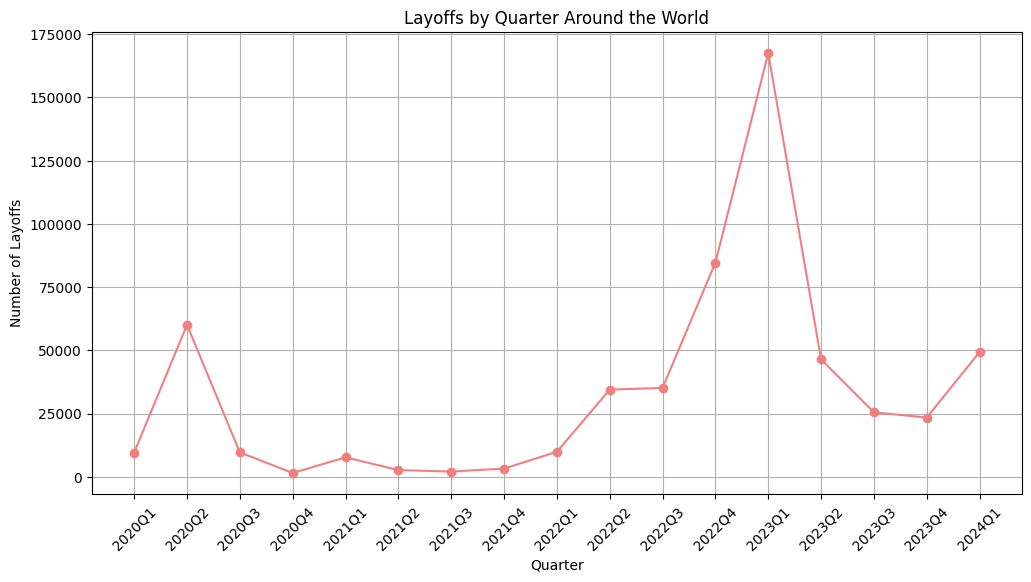

In [21]:
# Group by Quarter and sum layoffs
quarterly_layoffs = layoff_new.groupby('Quarter')['Layoffs'].sum()
# Convert the PeriodIndex to a list of strings for plotting
x_values = quarterly_layoffs.index.astype(str).tolist()  # Convert to strings

# Plot the time series with Quarter on the x-axis
plt.figure(figsize=(12, 6))
plt.plot(x_values, quarterly_layoffs.values, marker='o', linestyle='-', color='lightcoral') # Use x_values
plt.title('Layoffs by Quarter Around the World')
plt.xlabel('Quarter')
plt.ylabel('Number of Layoffs')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [22]:
# Create a dataframe that contains top 10 primary strength with their highest Layofss and Funds_Raised around the world
top10 = layoff_new.groupby(["Company", "Industry"], as_index=True)[["Layoffs", "Funds_Raised"]].median().nlargest(10, 'Layoffs')
print(top10)

                         Layoffs  Funds_Raised
Company  Industry                             
Meta     Consumer        10000.0       26000.0
Ericsson Other            8500.0         663.0
SAP      Other            5500.0        1300.0
Philips  Healthcare       5000.0           0.0
Cisco    Infrastructure   4100.0           2.0
Flink    Food             4050.0        1000.0
Micron   Hardware         3600.0          50.0
Dell     Hardware         3325.0           0.0
Xerox    Hardware         3000.0       27200.0
VMware   Infrastructure   2837.0         393.0


Text(0.5, 0, 'Company and its Industry')

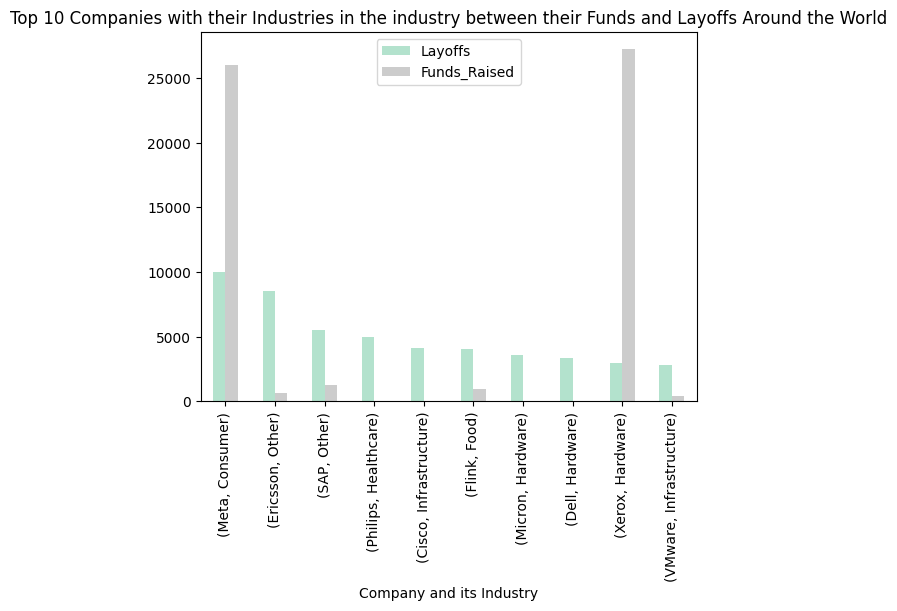

In [23]:
# create a bar graph to show top 10 primary strength with their highest Layofss and Funds_Raised around the world
top10.plot(kind = 'bar', title = 'Top 10 Companies with their Industries in the industry between their Funds and Layoffs Around the World', colormap='Pastel2')
plt.xlabel("Company and its Industry")

<h3>2. In America </h3>

In [104]:
# Grouping by industry and summing the layoffs
industry_layoffs_USA = layoff_USA.groupby('Industry')['Layoffs'].sum().sort_values(ascending=False).head(20)

# Generate random colors from the provided list
random_colors = random.sample(colors, len(industry_layoffs_USA))

# Bar chart for top industries with the most layoffs
fig3 = go.Figure([go.Bar(x=industry_layoffs_USA.index,
                          y=industry_layoffs_USA.values,
                          text=industry_layoffs_USA.values,
                          textposition='auto',
                          marker=dict(color=random_colors, line=dict(color='#000000', width=1)))],
                  layout=go.Layout(title='Top Industries with the Most Layoffs in America',
                                   yaxis=dict(title='Total layoff'), xaxis=dict(title='Industry')))

fig3.show()
fig3.update_layout(width=1200, height=600) # Adjust width and height as needed

In [105]:
# Grouping by industry and summing the layoffs
industry_percent_layoffs_USA = layoff_USA.groupby('Industry')['Percentage'].mean().sort_values(ascending=False).head(20)
industry_percent_layoffs_USA = round(industry_percent_layoffs_USA, 2)


# Generate random colors from the provided list
# random_colors = [random.choice(colors) for _ in range(len(industry_layoffs))]   ## this line generate randomly but the color can repeat twice
random_colors = random.sample(colors, len(industry_percent_layoffs_USA))            # this line generate color randomly in a list but not happen twice

# Enhanced bar chart for top industries with the most layoffs
fig4 = go.Figure([go.Bar(x=industry_percent_layoffs_USA.index,
                          y=industry_percent_layoffs_USA.values,
                          text=industry_percent_layoffs_USA.values,
                          textposition='auto',
                          marker=dict(color=random_colors, line=dict(color='#000000', width=1)))],
                  layout=go.Layout(title='Top Industries Percentage with the Most Layoffs in America',
                                   yaxis=dict(title='Average percentage of layoff'), xaxis=dict(title='Industry')))

fig4.show()
fig4.update_layout(width=1200, height=600) # Adjust width and height as needed

In [106]:
# Grouping by industry and summing the layoffs
location_layoffs = layoff_new.groupby('Location_HQ')['Layoffs'].sum().sort_values(ascending=False).head(20)

# Generate random colors from the provided list
random_colors = random.sample(colors, len(industry_layoffs))

# Bar chart for top industries with the most layoffs
fig6 = go.Figure([go.Bar(x=location_layoffs.index,
                          y=location_layoffs.values,
                          text=location_layoffs.values,
                          textposition='auto',
                          marker=dict(color=random_colors, line=dict(color='#000000', width=1)))],
                  layout=go.Layout(title='Top Locations with the Most Layoffs in America'))

fig6.show()
fig6.update_layout(width=1200, height=600) # Adjust width and height as needed

In [107]:
# Group by 'Date' and count the number of layoffs
layoff_USA_trend = layoff_USA.groupby('Date')['Layoffs'].sum().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 5))
fig8 = px.line(layoff_USA_trend, x='Date', y="Layoffs", markers = True,
              title='Layoffs Over Time in America',)
fig8.update_traces(line=dict(color='darkviolet'))
fig8.show()
fig8.update_layout(width=1200, height=600) # Adjust width and height as needed

<Figure size 1000x500 with 0 Axes>

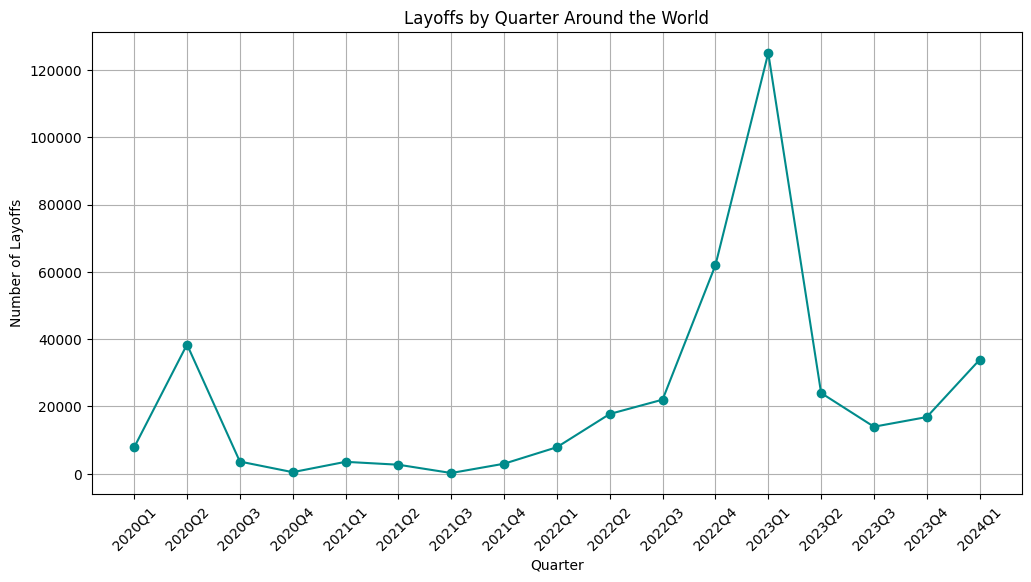

In [28]:
# Group by Quarter and sum layoffs
quarterly_layoffs_USA = layoff_USA.groupby('Quarter')['Layoffs'].sum()

# Convert the index to strings before plotting
quarterly_layoffs_USA.index = quarterly_layoffs_USA.index.astype(str)

# Plot the time series with Quarter on the x-axis
plt.figure(figsize=(12, 6))
plt.plot(quarterly_layoffs_USA.index, quarterly_layoffs_USA.values, marker='o', linestyle='-', color='darkcyan')
plt.title('Layoffs by Quarter Around the World')
plt.xlabel('Quarter')
plt.ylabel('Number of Layoffs')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [29]:
# Create a dataframe that contains top 10 primary strength with their highest Layofss and Funds_Raised in the USA
top10_USA = layoff_USA.groupby(["Company", "Industry"], as_index=True)[["Layoffs", "Funds_Raised"]].median().nlargest(10, 'Layoffs')
print(top10_USA)

                        Layoffs  Funds_Raised
Company Industry                             
Meta    Consumer        10000.0       26000.0
Cisco   Infrastructure   4100.0           2.0
Micron  Hardware         3600.0          50.0
Dell    Hardware         3325.0           0.0
Uber    Transportation   3000.0       24700.0
Xerox   Hardware         3000.0       27200.0
VMware  Infrastructure   2837.0         393.0
Indeed  HR               2200.0           5.0
PayPal  Finance          2000.0         216.0
IBM     Hardware         1950.0           0.0


Text(0.5, 0, 'Company and its Industry')

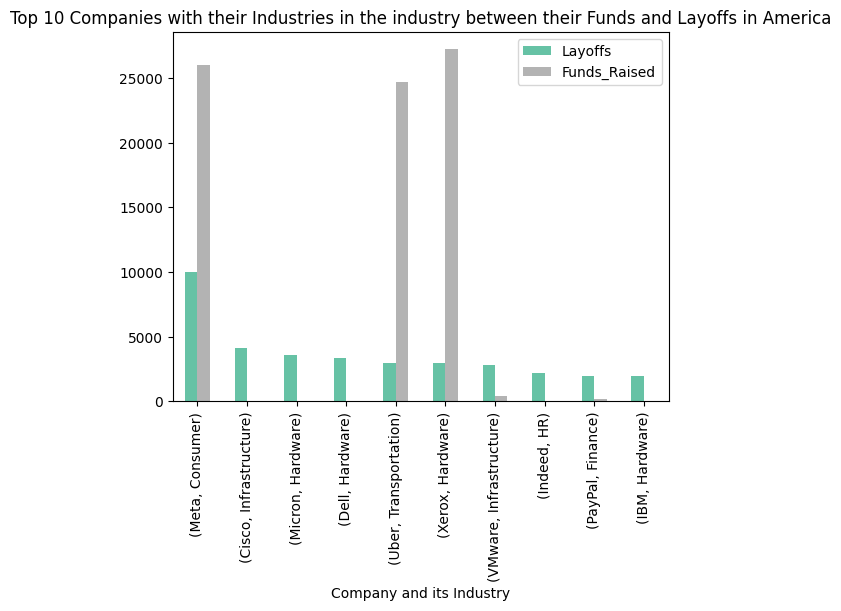

In [30]:
# create a bar graph to show top 10 primary strength with their highest Layofss and Funds_Raised around the world
top10_USA.plot(kind = 'bar', title = 'Top 10 Companies with their Industries in the industry between their Funds and Layoffs in America', colormap='Set2')
plt.xlabel("Company and its Industry")

Before doing correlation, I will export the cleaned dataset.

In [31]:
# Export to CSV file
layoff_new.to_csv('/content/drive/MyDrive/Project/layoff_clean.csv', index=False)
layoff_USA.to_csv('/content/drive/MyDrive/Project/layoff_USA_clean.csv', index=False)

<h3>III. Finding relationships and correlation between variables</h3>

<h3> 1. Converting & Showing Correlation between Y variable and its X variables </h3>

<h4>a. Around the World </h4>

In [31]:
layoff_new.head(10)

,Company,Location_HQ,Industry,Percentage,Date,Funds_Raised,Stage,Country,Layoffs,Quarter
0,Fisker,Los Angeles,Transportation,0.15,2024-02-29,1700.0,Post-IPO,United States,0.0,2024Q1
1,Electronic Arts,SF Bay Area,Consumer,0.05,2024-02-28,2.0,Post-IPO,United States,670.0,2024Q1
2,Vacasa,Portland,Travel,0.05,2024-02-28,834.0,Post-IPO,United States,320.0,2024Q1
3,Treasury Prime,SF Bay Area,Finance,0.40,2024-02-28,71.0,Series C,United States,40.0,2024Q1
4,Motional,Boston,Transportation,0.05,2024-02-28,0.0,Unknown,United States,0.0,2024Q1
5,Sony Interactive,SF Bay Area,Consumer,0.08,2024-02-27,0.0,Subsidiary,United States,900.0,2024Q1
6,Bumble,Austin,Consumer,0.30,2024-02-27,313.0,Post-IPO,United States,350.0,2024Q1
7,PropertyGuru,Singapore,Real Estate,0.00,2024-02-27,676.0,Post-IPO,Singapore,79.0,2024Q1
8,Apple,SF Bay Area,Transportation,0.00,2024-02-27,1200.0,Post-IPO,United States,0.0,2024Q1
9,Expedia,Seattle,Travel,0.08,2024-02-26,3300.0,Post-IPO,United States,1500.0,2024Q1


Before performing correlation, I convert categorical variable into numerical one. Then, I will decide to use Spearman Rank Correlation in case my data has non-linear relationship or if Layoffs has skewed distribution or outliers.

In [32]:
layoff_df = layoff_new.copy()
layoff_df = layoff_df.drop(columns=['Date', 'Quarter'])
layoff_df.head(10)

,Company,Location_HQ,Industry,Percentage,Funds_Raised,Stage,Country,Layoffs
0,Fisker,Los Angeles,Transportation,0.15,1700.0,Post-IPO,United States,0.0
1,Electronic Arts,SF Bay Area,Consumer,0.05,2.0,Post-IPO,United States,670.0
2,Vacasa,Portland,Travel,0.05,834.0,Post-IPO,United States,320.0
3,Treasury Prime,SF Bay Area,Finance,0.40,71.0,Series C,United States,40.0
4,Motional,Boston,Transportation,0.05,0.0,Unknown,United States,0.0
5,Sony Interactive,SF Bay Area,Consumer,0.08,0.0,Subsidiary,United States,900.0
6,Bumble,Austin,Consumer,0.30,313.0,Post-IPO,United States,350.0
7,PropertyGuru,Singapore,Real Estate,0.00,676.0,Post-IPO,Singapore,79.0
8,Apple,SF Bay Area,Transportation,0.00,1200.0,Post-IPO,United States,0.0
9,Expedia,Seattle,Travel,0.08,3300.0,Post-IPO,United States,1500.0


In [33]:
# Export to CSV file
layoff_df.to_csv('/content/drive/MyDrive/Project/layoff_clean_v2.csv', index=False)

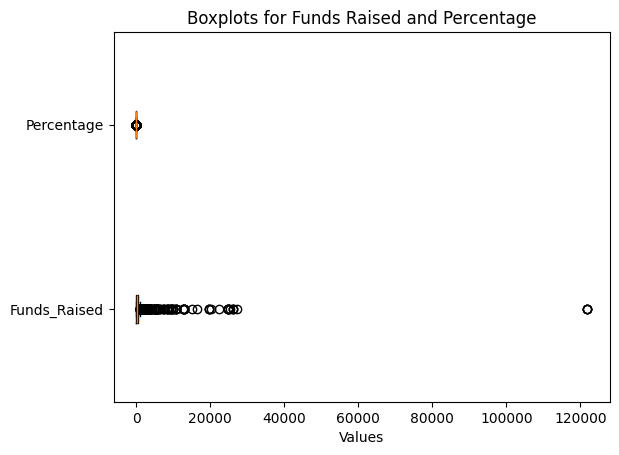

In [33]:
# List of columns to plot
columns_to_plot = ['Funds_Raised', 'Percentage']

# Create a horizontal boxplot for the selected columns
plt.boxplot([layoff_df[column] for column in columns_to_plot], vert=False, labels=columns_to_plot)

plt.title('Boxplots for Funds Raised and Percentage')
plt.xlabel('Values')
plt.show()

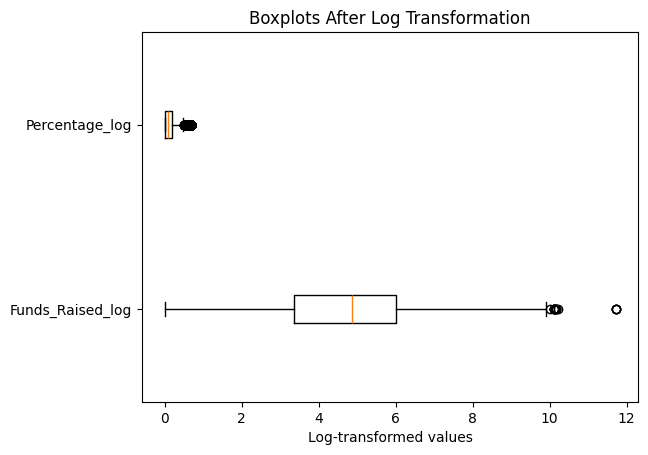

In [34]:
# Apply log1p transformation to skewed numeric columns
layoff_df['Funds_Raised_log'] = np.log1p(layoff_df['Funds_Raised'])
layoff_df['Percentage_log'] = np.log1p(layoff_df['Percentage'])

# Check boxplot after log transformation
plt.boxplot([layoff_df[col + '_log'] for col in ['Funds_Raised', 'Percentage']], vert=False, labels=[col + '_log' for col in ['Funds_Raised', 'Percentage']])
plt.title('Boxplots After Log Transformation')
plt.xlabel('Log-transformed values')
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning:

invalid value encountered in subtract



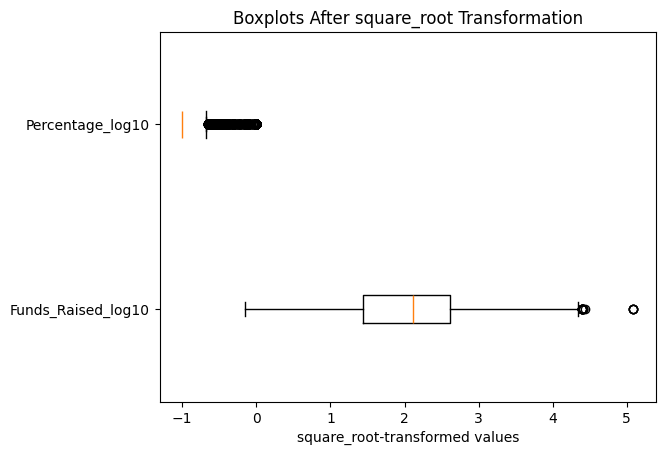

In [35]:
# Apply log10 transformation to skewed numeric columns
layoff_df['Funds_Raised_log10'] = np.log10(layoff_df['Funds_Raised'])
layoff_df['Percentage_log10'] = np.log10(layoff_df['Percentage'])

# Check boxplot after log transformation
plt.boxplot([layoff_df[col + '_log10'] for col in ['Funds_Raised', 'Percentage']], vert=False, labels=[col + '_log10' for col in ['Funds_Raised', 'Percentage']])
plt.title('Boxplots After square_root Transformation')
plt.xlabel('square_root-transformed values')
plt.show()

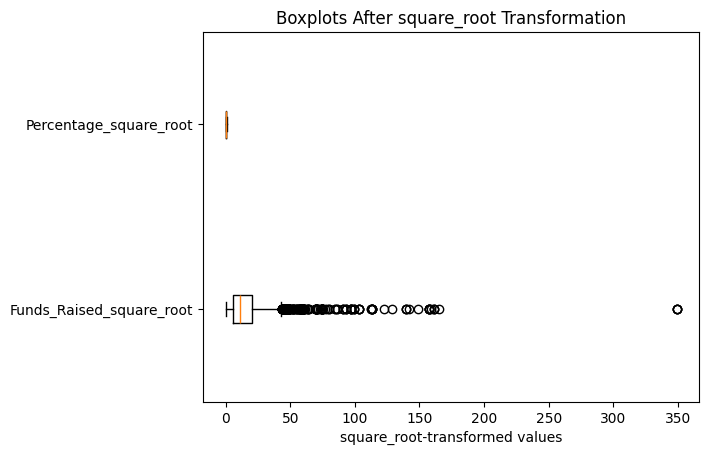

In [36]:
# Apply square root transformation to skewed numeric columns
layoff_df['Funds_Raised_square_root'] = np.sqrt(layoff_df['Funds_Raised'])
layoff_df['Percentage_square_root'] = np.sqrt(layoff_df['Percentage'])

# Check boxplot after log transformation
plt.boxplot([layoff_df[col + '_square_root'] for col in ['Funds_Raised', 'Percentage']], vert=False, labels=[col + '_square_root' for col in ['Funds_Raised', 'Percentage']])
plt.title('Boxplots After square_root Transformation')
plt.xlabel('square_root-transformed values')
plt.show()

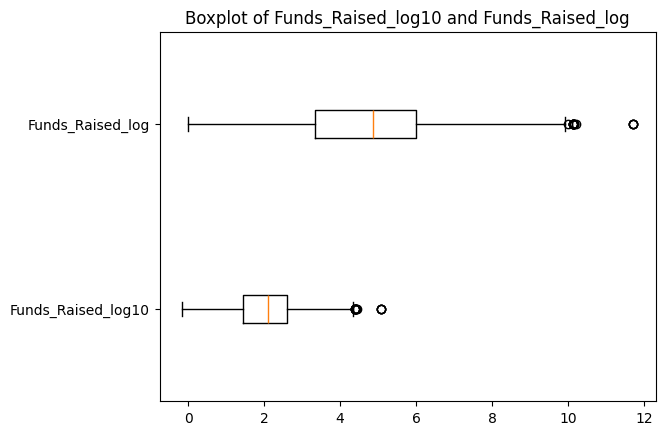

In [37]:
# Create boxplot for multiple columns to check log and log10 of Funds_Raised
plt.boxplot([layoff_df['Funds_Raised_log10'], layoff_df['Funds_Raised_log']], vert=False, labels=['Funds_Raised_log10', 'Funds_Raised_log'])
plt.title('Boxplot of Funds_Raised_log10 and Funds_Raised_log')
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning:

invalid value encountered in subtract



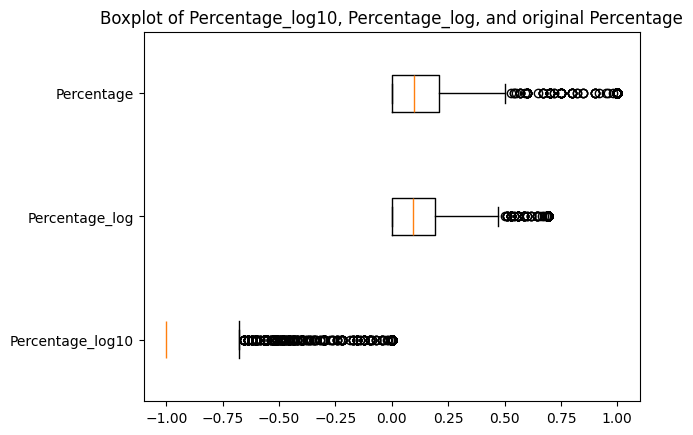

In [38]:
# Create boxplot for multiple columns to check log and log10 of Funds_Raised
plt.boxplot([layoff_df['Percentage_log10'], layoff_df['Percentage_log'], layoff_df['Percentage']], vert=False, labels=['Percentage_log10', 'Percentage_log', 'Percentage'])
plt.title('Boxplot of Percentage_log10, Percentage_log, and original Percentage')
plt.show()

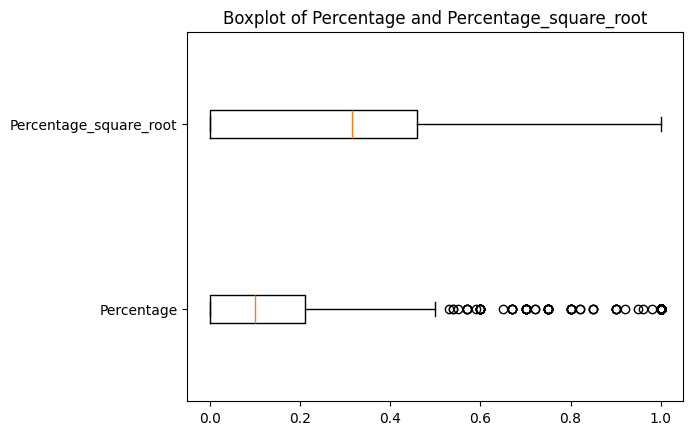

In [39]:
# Create boxplot for multiple columns to check log and log10 of Funds_Raised
plt.boxplot([layoff_df['Percentage'], layoff_df['Percentage_square_root']], vert=False, labels=['Percentage', 'Percentage_square_root'])
plt.title('Boxplot of Percentage and Percentage_square_root')
plt.show()

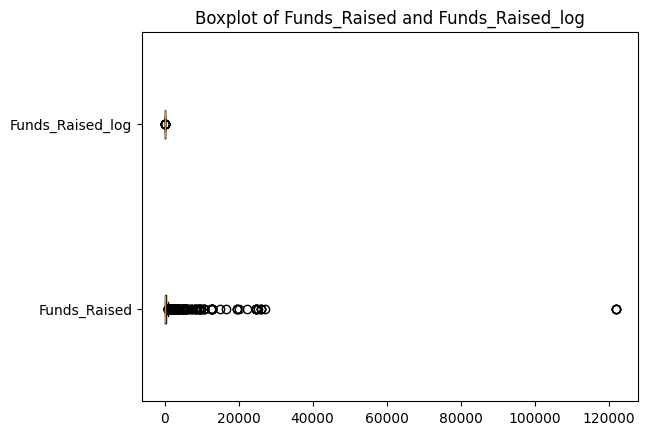

In [40]:
# Create boxplot for multiple columns to check log and log10 of Funds_Raised
plt.boxplot([layoff_df['Funds_Raised'], layoff_df['Funds_Raised_log']], vert=False, labels=['Funds_Raised', 'Funds_Raised_log'])
plt.title('Boxplot of Funds_Raised and Funds_Raised_log')
plt.show()

In [41]:
layoff_df.drop(['Funds_Raised_square_root', 'Funds_Raised_log', 'Percentage_log10', 'Percentage_log', 'Funds_Raised', 'Percentage'], axis=1, inplace=True)

In [42]:
layoff_df.head(10)

,Company,Location_HQ,Industry,Stage,Country,Layoffs,Funds_Raised_log10,Percentage_square_root
0,Fisker,Los Angeles,Transportation,Post-IPO,United States,0.0,3.230449,0.387298
1,Electronic Arts,SF Bay Area,Consumer,Post-IPO,United States,670.0,0.301030,0.223607
2,Vacasa,Portland,Travel,Post-IPO,United States,320.0,2.921166,0.223607
3,Treasury Prime,SF Bay Area,Finance,Series C,United States,40.0,1.851258,0.632456
4,Motional,Boston,Transportation,Unknown,United States,0.0,-inf,0.223607
5,Sony Interactive,SF Bay Area,Consumer,Subsidiary,United States,900.0,-inf,0.282843
6,Bumble,Austin,Consumer,Post-IPO,United States,350.0,2.495544,0.547723
7,PropertyGuru,Singapore,Real Estate,Post-IPO,Singapore,79.0,2.829947,0.000000
8,Apple,SF Bay Area,Transportation,Post-IPO,United States,0.0,3.079181,0.000000
9,Expedia,Seattle,Travel,Post-IPO,United States,1500.0,3.518514,0.282843


In [43]:
layoff_df.loc[layoff_df['Funds_Raised_log10'] == -np.inf, 'Funds_Raised_log10'] = np.nan
# Convert NaN values to 0
layoff_df.fillna(0, inplace=True)

In [96]:
layoff_df.head(10)

,Company,Location_HQ,Industry,Stage,Country,Layoffs,Funds_Raised_log10,Percentage_square_root
0,Fisker,Los Angeles,Transportation,Post-IPO,United States,0.0,3.230449,0.387298
1,Electronic Arts,SF Bay Area,Consumer,Post-IPO,United States,670.0,0.301030,0.223607
2,Vacasa,Portland,Travel,Post-IPO,United States,320.0,2.921166,0.223607
3,Treasury Prime,SF Bay Area,Finance,Series C,United States,40.0,1.851258,0.632456
4,Motional,Boston,Transportation,Unknown,United States,0.0,0.000000,0.223607
5,Sony Interactive,SF Bay Area,Consumer,Subsidiary,United States,900.0,0.000000,0.282843
6,Bumble,Austin,Consumer,Post-IPO,United States,350.0,2.495544,0.547723
7,PropertyGuru,Singapore,Real Estate,Post-IPO,Singapore,79.0,2.829947,0.000000
8,Apple,SF Bay Area,Transportation,Post-IPO,United States,0.0,3.079181,0.000000
9,Expedia,Seattle,Travel,Post-IPO,United States,1500.0,3.518514,0.282843


In [94]:
corr = layoff_df[['Funds_Raised_log10', 'Percentage_square_root', 'Layoffs']].corr(method='spearman')
print(corr)

                        Funds_Raised_log10  Percentage_square_root   Layoffs
Funds_Raised_log10                1.000000               -0.118783  0.232488
Percentage_square_root           -0.118783                1.000000  0.076734
Layoffs                           0.232488                0.076734  1.000000


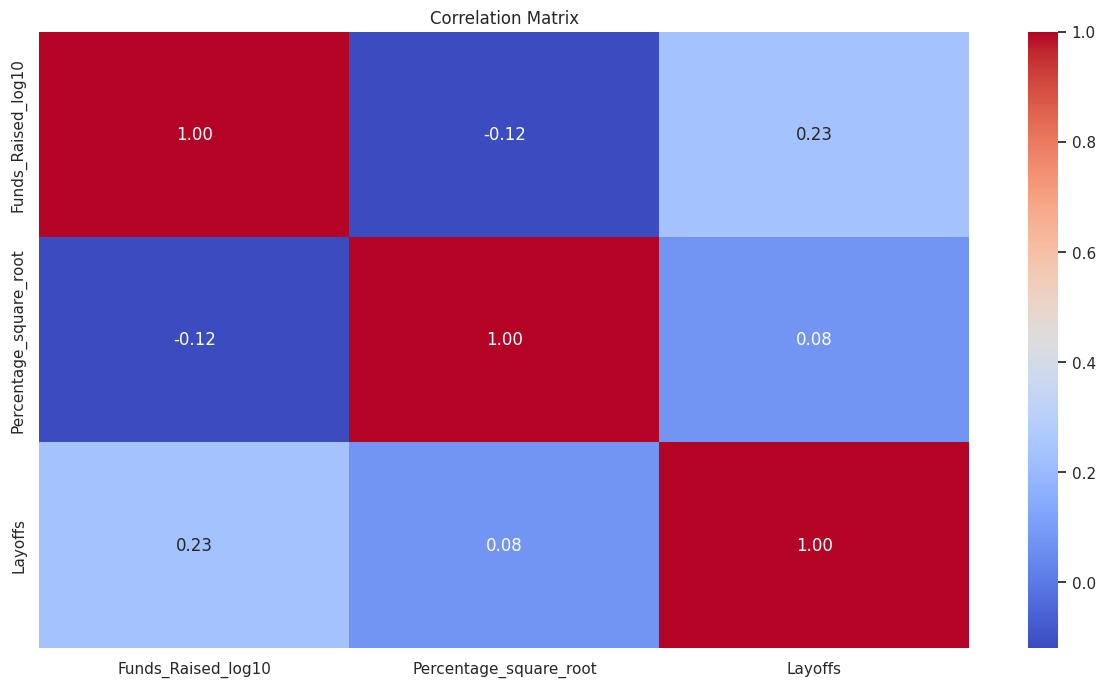

Selected Features based on correlation: Index(['Funds_Raised_log10', 'Layoffs'], dtype='object')


In [97]:
# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Select features that have a high correlation with 'Layoffs'
corr_threshold = 0.1  # Set your threshold
corr_target = corr['Layoffs'].abs()
selected_features_corr = corr_target[corr_target > corr_threshold].index
print("Selected Features based on correlation:", selected_features_corr)

# Update the predictors with selected features based on correlation
predictors_corr = layoff_df[selected_features_corr].drop(columns='Layoffs')

In [92]:
# Calculate correlation matrix
corr_matrix = layoff_df[['Funds_Raised_log10', 'Percentage_square_root', 'Layoffs']].corr(method='pearson')

# Display the correlation matrix
print(corr_matrix)

                        Funds_Raised_log10  Percentage_square_root   Layoffs
Funds_Raised_log10                1.000000               -0.161963  0.069375
Percentage_square_root           -0.161963                1.000000  0.003317
Layoffs                           0.069375                0.003317  1.000000


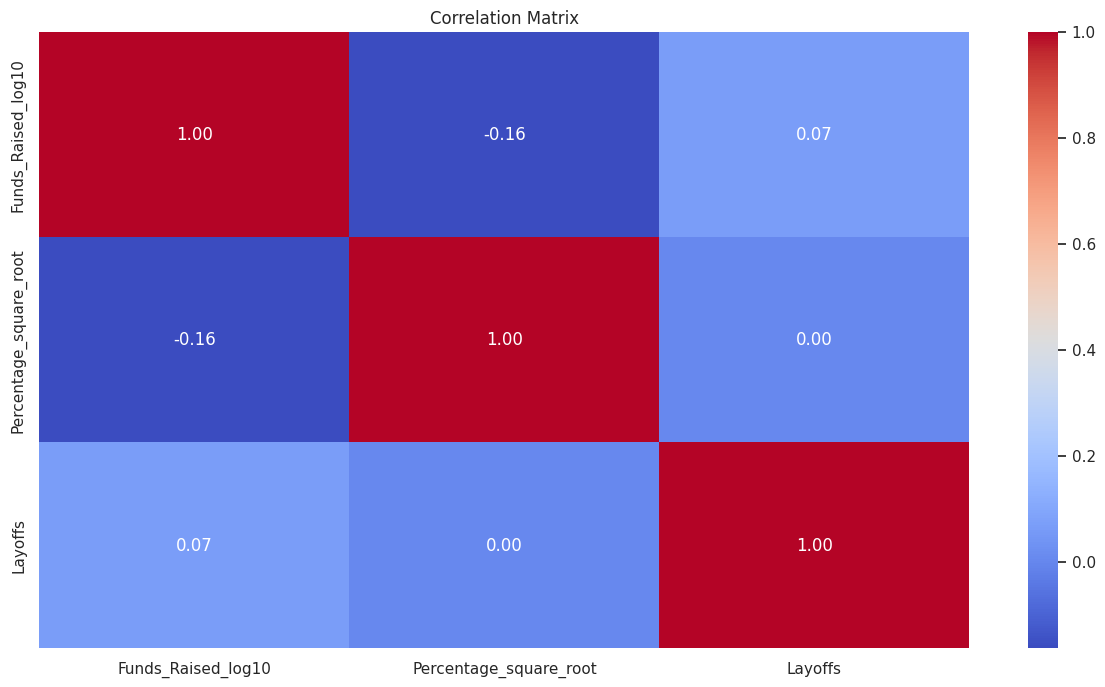

Selected Features based on correlation: Index(['Funds_Raised_log10', 'Layoffs'], dtype='object')


In [98]:
# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Select features that have a high correlation with 'Layoffs'
corr_threshold = 0.1  # Set your threshold
corrmatrix_target = corr_matrix['Layoffs'].abs()
selected_corr = corr_target[corrmatrix_target > corr_threshold].index
print("Selected Features based on correlation:", selected_features_corr)

# Update the predictors with selected features based on correlation
predictors_corr = layoff_df[selected_corr].drop(columns='Layoffs')

<h2>IV. Model Selection: </h2>

**Y Variable:** Layoffs

**X Variables:** Company, Location_HQ, Industry, Percentage, Funds_Raised, Stage, Date


<h3>1. Around the World: </h3>

<h4> a. Linear Regression </h4>

In [78]:
# Select the features and target variable
X = layoff_df[['Percentage_square_root', 'Funds_Raised_log10']]
Y = layoff_df['Layoffs']  # Assuming 'Layoffs' is the target for this example

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [79]:
print("number of NaN values for the train data :",X_train.isna().sum())
print("number of NaN values for the test data :",X_test.isna().sum())
print("number of NaN values for the train solution :",Y_train.isna().sum())
print("number of NaN values for the test solution :",Y_test.isna().sum())

number of NaN values for the train data : Percentage_square_root    0
Funds_Raised_log10        0
dtype: int64
number of NaN values for the test data : Percentage_square_root    0
Funds_Raised_log10        0
dtype: int64
number of NaN values for the train solution : 0
number of NaN values for the test solution : 0


In [80]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2786, 2)
(697, 2)
(2786,)
(697,)


In [81]:
# Create a pipeline that includes scaling and linear regression
linear = Pipeline([
    ('scaler', StandardScaler()),    # Step 1: Normalize data
    ('linear_regression', LinearRegression())  # Step 2: Apply Linear Regression
])

# Train the model
linear.fit(X_train, Y_train)

# Make predictions
linear_predictions_test = linear.predict(X_test)
linear_predictions_train = linear.predict(X_train)


# Calculate the mean squared error (MSE) between the predicted and actual values
linear_mse = metrics.mean_squared_error(Y_test, linear_predictions_test)
linear_r2_test = metrics.r2_score(Y_test, linear_predictions_test)
linear_r2_train = metrics.r2_score(Y_train, linear_predictions_train)

<h4> b. Decsion Tree Regressor </h4>

In [61]:
# Select the features and target variable
X = layoff_df[['Location_HQ', 'Industry', 'Percentage_square_root', 'Funds_Raised_log10', 'Stage', 'Country']]
y = layoff_df['Layoffs']  # Assuming 'Layoffs' is the target for this example

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
print("number of NaN values for the train data :",X_train.isna().sum())
print("number of NaN values for the test data :",X_test.isna().sum())
print("number of NaN values for the train solution :",y_train.isna().sum())
print("number of NaN values for the test solution :",y_test.isna().sum())

number of NaN values for the train data : Location_HQ               0
Industry                  0
Percentage_square_root    0
Funds_Raised_log10        0
Stage                     0
Country                   0
dtype: int64
number of NaN values for the test data : Location_HQ               0
Industry                  0
Percentage_square_root    0
Funds_Raised_log10        0
Stage                     0
Country                   0
dtype: int64
number of NaN values for the train solution : 0
number of NaN values for the test solution : 0


In [59]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2786, 6)
(697, 6)
(2786,)
(697,)


In [66]:
# Define a column transformer to one-hot encode categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), ['Location_HQ', 'Industry', 'Stage', 'Country'])
    ],
    remainder='passthrough'  # Keep numerical columns as they are
)

# Create a pipeline that includes preprocessing and the decision tree regressor
decision_tree = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Train the model
decision_tree.fit(X_train, y_train)

# Make predictions
decision_pred_test = decision_tree.predict(X_test)
decision_pred_train = decision_tree.predict(X_train)

# Calculate the mean squared error (MSE) between the predicted and actual values
decision_mse = metrics.mean_squared_error(y_test, decision_pred_test)
decision_r2_test = metrics.r2_score(y_test, decision_pred_test)
decision_r2_train = metrics.r2_score(y_train, decision_pred_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning:

Found unknown categories in columns [0, 3] during transform. These unknown categories will be encoded as all zeros



<h4> c. Random Forest Regressor </h4>

In [69]:
# Create a pipeline that includes preprocessing and the decision tree regressor
random_forest = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions
random_forest_pred_test = random_forest.predict(X_test)
random_forest_pred_train = random_forest.predict(X_train)

# Calculate the mean squared error (MSE) between the predicted and actual values
random_forest_mse = metrics.mean_squared_error(y_test, random_forest_pred_test)
random_forest_r2_test = metrics.r2_score(y_test, random_forest_pred_test)
random_forest_r2_train = metrics.r2_score(y_train, random_forest_pred_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning:

Found unknown categories in columns [0, 3] during transform. These unknown categories will be encoded as all zeros



In [82]:
# create a table for default value
world = {'Non-Normalized Algorithm with default value': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'Mean Squared Error (MSE)': [linear_mse, decision_mse, random_forest_mse],
    'R2_score with test data': [linear_r2_test, decision_r2_train, random_forest_r2_test],
    'R2_score with train data': [linear_r2_train, decision_r2_train, random_forest_r2_train]}
pd.DataFrame(world)

,Non-Normalized Algorithm with default value,Mean Squared Error (MSE),R2_score with test data,R2_score with train data
0,Linear Regression,494584.389182,0.000252,0.005893
1,Decision Tree,590784.752893,0.995318,0.995318
2,Random Forest,377025.023829,0.237885,0.850301
